# Звіт з лабораторної роботи №8

Виконав студент групи КН-24-1 Озівський В. В.

Тема: Структура даних граф. Алгоритми на графах
\
Мета: засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.

### <center>Хід роботи</center>

#### 1. Власна реалізація класів Graph та Vertex

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}
    
    def addNeighbor(self, nbr, weight=0):
        self.connectedTo[nbr] = weight
    
    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self, nbr):
        return self.connectedTo[nbr]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
    
    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
    
    def __contains__(self, n):
        return n in self.vertList
    
    def addEdge(self, f, t, cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)
    
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())

#### 2. Створення та візуалізація графа

In [26]:
# ================================
# 2. СТВОРЕННЯ ТА ВІЗУАЛІЗАЦІЯ ГРАФА
# ================================

import networkx as nx
import matplotlib.pyplot as plt

def create_and_visualize_graph():
   # Задаємо дані графа
   edges = [
       (6, 2, 8),   # з 6 до 2 з вагою 8
       (6, 3, 7),   # з 6 до 3 з вагою 7
       (3, 1, 3),   # з 3 до 1 з вагою 3
       (3, 6, 8),   # з 3 до 6 з вагою 8
       (1, 5, 2),   # з 1 до 5 з вагою 2
       (2, 4, 7),   # з 2 до 4 з вагою 7
       (2, 5, 1),   # з 2 до 5 з вагою 1
       (5, 2, 4),   # з 5 до 2 з вагою 4
       (5, 4, 1),   # з 5 до 4 з вагою 1
   ]

   # Створюємо орієнтований граф (DiGraph замість Graph)
   G = nx.DiGraph()

   # Додаємо ребра з вагами
   for i, j, weight in edges:
       G.add_edge(i, j, weight=weight)

   # Створюємо словник ваг (використовується для відображення на графіку)
   edge_labels = {(i, j): weight for i, j, weight in edges}

   # Створюємо позиції вузлів для більш естетичного розташування
   # Використовуємо циркулярне розташування і трохи підкоригуємо
   pos = nx.circular_layout(G)

   # Задаємо розмір рисунка
   plt.figure(figsize=(10, 8))

   # Малюємо вузли
   nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', edgecolors='black')

   # Малюємо ребра з стрілками для орієнтованого графа
   nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)

   # Додаємо підписи до вузлів
   nx.draw_networkx_labels(G, pos, font_size=18, font_weight='bold')

   # Додаємо підписи до ребер (ваги)
   nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red',
                            font_weight='bold', rotate=False)

   # Видаляємо осі
   plt.axis('off')

   # Додаємо заголовок
   plt.title('Орієнтований зважений граф', fontsize=20, fontweight='bold', 
             pad=20)

   # Показуємо графік
   plt.tight_layout()
   plt.show()
   
   return G

#### 3. Реалізація алгоритму Дейкстри

In [3]:
def dijkstra_algorithm(G):
    # Перевіряємо чи існує вершина 1 в графі
    if 1 not in G.nodes():
        print("Вершина 1 не існує в графі")
        return
    
    try:
        # Знаходження найкоротших шляхів від вершини 1
        length, path = nx.single_source_dijkstra(G, 1)
        
        print("Найкоротші відстані від вершини 1:")
        for vertex in sorted(length.keys()):
            print(f"  До вершини {vertex}: {length[vertex]}")
        
        print("\nНайкоротші шляхи від вершини 1:")
        for vertex in sorted(path.keys()):
            print(f"  До вершини {vertex}: {' -> '.join(map(str, path[vertex]))}")
            
    except nx.NetworkXNoPath as e:
        print(f"Помилка: {e}")
    except Exception as e:
        print(f"Помилка при виконанні алгоритму Дейкстри: {e}")

#### 4. Реалізація алгоритму Беллмана-Форда

In [5]:
def bellman_ford_algorithm(G):
    if 1 not in G.nodes():
        print("Вершина 1 не існує в графі")
        return
    
    try:
        # Знаходження найкоротших відстаней
        length = nx.single_source_bellman_ford_path_length(G, 1)
        paths = nx.single_source_bellman_ford_path(G, 1)
        
        print("Найкоротші відстані від вершини 1 (Беллман-Форд):")
        for vertex in sorted(length.keys()):
            print(f"  До вершини {vertex}: {length[vertex]}")
        
        print("\nНайкоротші шляхи від вершини 1 (Беллман-Форд):")
        for vertex in sorted(paths.keys()):
            print(f"  До вершини {vertex}: {' -> '.join(map(str, paths[vertex]))}")
            
    except nx.NetworkXUnbounded:
        print("Граф містить цикл з від'ємною вагою")
    except Exception as e:
        print(f"Помилка при виконанні алгоритму Беллмана-Форда: {e}")

#### 5. Реалізація пошуку в глибину

In [6]:
def dfs_algorithm(G):
    def dfs(graph, start, visited=None):
        if visited is None:
            visited = set()
        visited.add(start)
        
        # Використовуємо successors для орієнтованого графа
        for next_vertex in set(graph.successors(start)) - visited:
            dfs(graph, next_vertex, visited)
        return visited
    
    def dfs_paths(graph, start, goal, path=None):
        if path is None:
            path = [start]
        if start == goal:
            yield path
        
        for next_vertex in set(graph.successors(start)) - set(path):
            yield from dfs_paths(graph, next_vertex, goal, path + [next_vertex])
    
    # Обхід графа з вершини 1
    if 1 in G.nodes():
        visited = dfs(G, 1)
        print(f"Відвідані вершини при DFS з вершини 1: {sorted(visited)}")
    
    # Пошук всіх шляхів між вершинами
    start_vertex = 1
    goal_vertex = 4
    
    if start_vertex in G.nodes() and goal_vertex in G.nodes():
        paths = list(dfs_paths(G, start_vertex, goal_vertex))
        print(f"\nВсі шляхи від вершини {start_vertex} до вершини {goal_vertex} (DFS):")
        for i, path in enumerate(paths, 1):
            print(f"  Шлях {i}: {' -> '.join(map(str, path))}")
        
        if not paths:
            print(f"  Шляхів від {start_vertex} до {goal_vertex} не знайдено")

#### 6. Реалізація пошуку в ширину

In [7]:
def bfs_algorithm(G):
    def bfs_paths(graph, start, goal):
        queue = [(start, [start])]
        while queue:
            (vertex, path) = queue.pop(0)
            
            for next_vertex in set(graph.successors(vertex)) - set(path):
                if next_vertex == goal:
                    yield path + [next_vertex]
                else:
                    queue.append((next_vertex, path + [next_vertex]))
    
    # Пошук всіх шляхів між вершинами
    start_vertex = 1
    goal_vertex = 4
    
    if start_vertex in G.nodes() and goal_vertex in G.nodes():
        paths = list(bfs_paths(G, start_vertex, goal_vertex))
        print(f"Всі шляхи від вершини {start_vertex} до вершини {goal_vertex} (BFS):")
        for i, path in enumerate(paths, 1):
            print(f"  Шлях {i}: {' -> '.join(map(str, path))}")
        
        if not paths:
            print(f"  Шляхів від {start_vertex} до {goal_vertex} не знайдено")

#### 7. Додаткові алгоритми для аналізу графа

In [30]:
def additional_algorithms(G):
    # Перевірка на циклічність
    try:
        cycles = list(nx.simple_cycles(G))
        if cycles:
            print("Знайдені цикли в графі:")
            for i, cycle in enumerate(cycles, 1):
                print(f"  Цикл {i}: {' -> '.join(map(str, cycle + [cycle[0]]))}")
        else:
            print("Граф є ациклічним (DAG)")
    except Exception as e:
        print(f"Помилка при пошуку циклів: {e}")
    
    # Топологічне сортування (якщо граф ациклічний)
    try:
        if nx.is_directed_acyclic_graph(G):
            topo_sort = list(nx.topological_sort(G))
            print(f"Топологічне сортування: {' -> '.join(map(str, topo_sort))}")
        else:
            print("Топологічне сортування неможливе - граф містить цикли")
    except Exception as e:
        print(f"Помилка при топологічному сортуванні: {e}")

#### Візуалізація графа

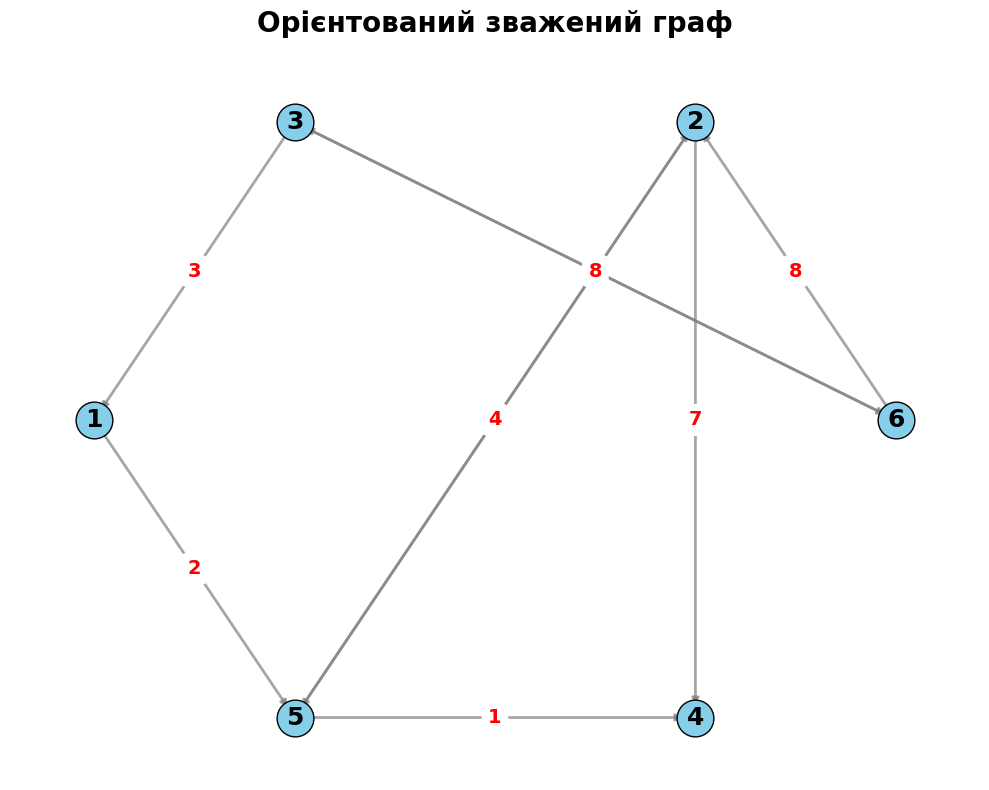

In [32]:
G = create_and_visualize_graph()

#### Виконання всіх алгоритмів

In [31]:
dijkstra_algorithm(G)
bellman_ford_algorithm(G)
dfs_algorithm(G)
bfs_algorithm(G)
additional_algorithms(G)

Найкоротші відстані від вершини 1:
  До вершини 1: 0
  До вершини 2: 6
  До вершини 4: 3
  До вершини 5: 2

Найкоротші шляхи від вершини 1:
  До вершини 1: 1
  До вершини 2: 1 -> 5 -> 2
  До вершини 4: 1 -> 5 -> 4
  До вершини 5: 1 -> 5
Найкоротші відстані від вершини 1 (Беллман-Форд):
  До вершини 1: 0
  До вершини 2: 6
  До вершини 4: 3
  До вершини 5: 2

Найкоротші шляхи від вершини 1 (Беллман-Форд):
  До вершини 1: 1
  До вершини 2: 1 -> 5 -> 2
  До вершини 4: 1 -> 5 -> 4
  До вершини 5: 1 -> 5
Відвідані вершини при DFS з вершини 1: [1, 2, 4, 5]

Всі шляхи від вершини 1 до вершини 4 (DFS):
  Шлях 1: 1 -> 5 -> 2 -> 4
  Шлях 2: 1 -> 5 -> 4
Всі шляхи від вершини 1 до вершини 4 (BFS):
  Шлях 1: 1 -> 5 -> 4
  Шлях 2: 1 -> 5 -> 2 -> 4
Знайдені цикли в графі:
  Цикл 1: 3 -> 6 -> 3
  Цикл 2: 2 -> 5 -> 2
Топологічне сортування неможливе - граф містить цикли


### Відповіді на контрольні питання

1. Що таке граф?
\
Граф G = (V, E) - структура з вершин V і ребер E, що їх з'єднують.
\
Приклади: соціальні мережі, дорожні карти, інтернет-топологія, електричні схеми.

2. Види графів:

- Орієнтовані - ребра мають напрямок (→)
- Неорієнтовані - ребра без напрямку (—)
- Зважені/незважені - з вагами ребер чи без
- Циклічні/ациклічні - з циклами чи без

3. Представлення в пам'яті:

- Матриця суміжності - двовимірний масив [V×V]
- Список суміжності - словник/масив списків сусідів
- Список ребер - масив кортежів (u,v,weight)

4. BFS (пошук у ширину):
\
Обходить граф по рівнях, використовує чергу.
\
Застосування: найкоротший шлях в незваженому графі, пошук компонент зв'язності.

5. DFS (пошук у глибину):
\
Йде максимально глибоко, використовує стек/рекурсію.
\
Відмінність від BFS: досліджує спочатку глибину, потім ширину.
\
Застосування: топологічне сортування, пошук циклів, лабіринти.


6. Алгоритм Дейкстри:
\
Знаходить найкоротші шляхи від однієї вершини до всіх інших.
\
Умови: всі ваги ребер ≥ 0, граф зв'язний.
\
Складність: $O((V+E)logV)$.